**PROBLEMA DE NEGOCIO**


Una cadena de supermercado online que opera en Brasil quiere obtener insights sobre las ventas de sus productos

Para ello debemos responder las siguientes preguntas:
1. ¿Cuáles son las ventas totales por año?¿Qué año tuvo mejor desempeño?
2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el periodo?
3. Si separamos las ventas totales por año y regiones ¿Qué insights podemos obtener de nuestras ventas?
4. ¿Cuál es el método de envío más utilizado por los clientes del supermercado?¿Es proporcional para B2B y B2C?
5. Cuáles son las ventas totales por trimestre en el estado de Sao Paulo?

In [32]:
# Configración del ambiente
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
# Definiendo las variables globales
def obtencion_datos():
  global df_ventas, df_ventas_limpio

In [3]:
# Obtención de Datos
df_ventas = pd.read_csv('reporte_ventas.csv')


In [4]:
# Transformar columnas 'fecha_pedido' y 'fecha_envio' a formato datetime
df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
df_ventas['fecha_envio']= pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')


In [5]:
df_ventas = pd.read_csv('reporte_ventas.csv')
print('Información:')
print(df_ventas.info())
print('-------------')
print('Duplicados:')
print(df_ventas.duplicated().sum())
print('-------------')
print('Registros de Prueba:')
print((df_ventas['nombre_cliente'] == 'prueba').sum())
print('--------------')
print('Registros con ganancia<=0:')
print((df_ventas['total_ganancia'] <= 0).sum())

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int6

In [6]:
# Copiar el DataFrame original para mantener el original sin cambios
df_ventas_limpio = df_ventas.copy()

In [7]:
# Eliminar duplicados
df_ventas_limpio = df_ventas_limpio.drop_duplicates()

In [8]:
# Eliminar registros de prueba
df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']

In [9]:
# Eliminar registros con valor nulo en 'nombre_cliente'
df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])

In [10]:
# Filtrar operaciones sin ganancia
df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]

In [11]:
# Actualizar el índice
df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)

In [12]:
# Manejar valores nulos (por ejemplo, llenarlos con el valor medio)
df_ventas_limpio['nombre_cliente'].fillna(df_ventas_limpio['nombre_cliente'].mode()[0], inplace=True)


In [13]:
# Corregir tipos de datos
df_ventas_limpio['ciudad'] = df_ventas_limpio['ciudad'].astype('category')
df_ventas_limpio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   fecha_pedido           7210 non-null   object  
 1   fecha_envio            7210 non-null   object  
 2   modo_envio             7210 non-null   object  
 3   nombre_cliente         7210 non-null   object  
 4   segmento_cliente       7210 non-null   object  
 5   ciudad                 7210 non-null   category
 6   estado                 7210 non-null   object  
 7   region                 7210 non-null   object  
 8   departamento_producto  7210 non-null   object  
 9   tipo_producto          7210 non-null   object  
 10  precio_base            7210 non-null   float64 
 11  precio_unit_sin_desc   7210 non-null   float64 
 12  descuento              7210 non-null   float64 
 13  precio_unit_venta      7210 non-null   float64 
 14  cantidad_pedido        7210 non-null   i

In [14]:
# Imprimir información del DataFrame limpio
print('Información del DataFrame limpio:')
print(df_ventas_limpio.info())
print('-------------')
print('Duplicados:')
print(df_ventas_limpio.duplicated().sum())
print('------------')
print('Registros de prueba:')
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros con ganancias<=0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum())

Información del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   fecha_pedido           7210 non-null   object  
 1   fecha_envio            7210 non-null   object  
 2   modo_envio             7210 non-null   object  
 3   nombre_cliente         7210 non-null   object  
 4   segmento_cliente       7210 non-null   object  
 5   ciudad                 7210 non-null   category
 6   estado                 7210 non-null   object  
 7   region                 7210 non-null   object  
 8   departamento_producto  7210 non-null   object  
 9   tipo_producto          7210 non-null   object  
 10  precio_base            7210 non-null   float64 
 11  precio_unit_sin_desc   7210 non-null   float64 
 12  descuento              7210 non-null   float64 
 13  precio_unit_venta      7210 non-null   float64 
 14  cantid

**Pregunta N° 1**: ¿Cuáles son las ventas totales por año? ¿Y en qué año tuvo mejor desempeño?

In [15]:
# Crear una copia de df_ventas_limpio con las columnas 'fecha_pedido' y 'total_venta'
df_ventas_año = df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()

In [16]:
# Asegurarse de que 'fecha_pedido' sea del tipo de datos datetime
df_ventas_año['fecha_pedido'] = pd.to_datetime(df_ventas_año['fecha_pedido'], format='%Y-%m-%d')

In [17]:
# Crear una nueva columna 'año' y eliminar 'fecha_pedido'
df_ventas_año['año'] = df_ventas_año['fecha_pedido'].dt.year
df_ventas_año.drop('fecha_pedido', axis=1, inplace=True)

In [18]:
# Agrupar por 'año' y sumarizar los valores de 'total_venta'
df_ventas_año = df_ventas_año.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()

In [19]:
df_ventas_año.head()

,año,total_venta
0,2019,1052735.86
1,2020,1190541.40
2,2021,1535801.44
3,2022,1825927.50


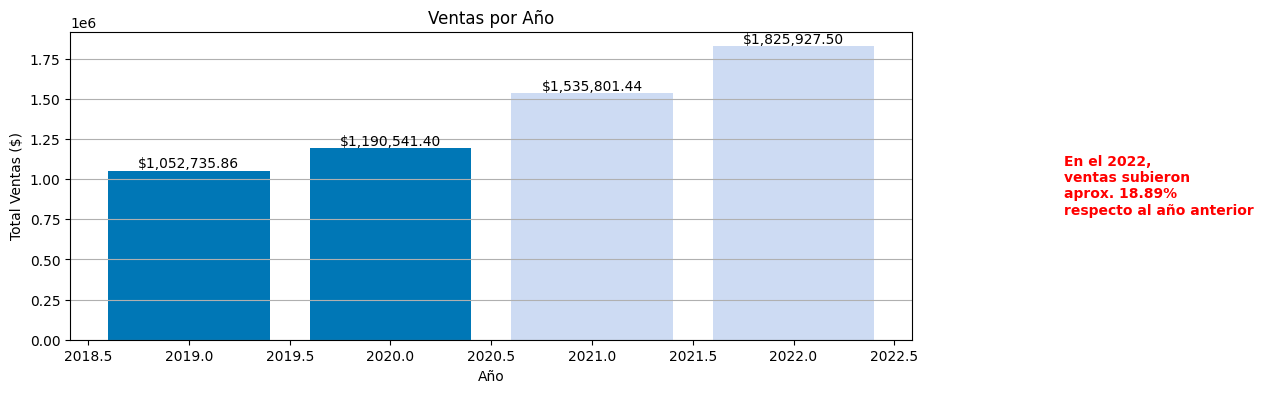

In [21]:
import matplotlib.pyplot as plt

# Configurar la figura y los ejes (subgráficos)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4), gridspec_kw={'width_ratios': [5, 1]})

# Datos para el gráfico de barras
ejeX = df_ventas_año['año']
ejeY = df_ventas_año['total_venta']
colores = ['#0077b6', '#0077b6', '#CDDBF3', '#CDDBF3']

# Crear el gráfico de barras verticales en el primer subgráfico (ax1)
ax1.bar(ejeX, ejeY, color=colores, width=0.8)

# Colocar los valores sobre cada barra en el primer subgráfico
for bar in ax1.patches:
    valor = bar.get_height()
    qtd = f"${valor:,.2f}"  # Formatear el valor como texto con símbolo de dólar
    ax1.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd, ha='center', va='bottom')

# Configurar el gráfico de barras (primer subgráfico)
ax1.set_title('Ventas por Año')
ax1.set_xlabel('Año')
ax1.set_ylabel('Total Ventas ($)')
ax1.grid(axis='y')

# Obtener la posición de la barra del año 2022
posicion_2022 = ejeX.tolist().index(2022)

# Configurar el segundo subgráfico (ax2) solo para el mensaje
ax2.axis('off')  # Desactivar los ejes en el segundo subgráfico

# Agregar el comentario en el segundo subgráfico
fontsize = 18
comentario = "En el 2022,\nventas subieron\naprox. 18.89%\nrespecto al año anterior"
ax2.text(0, 0.5, comentario, ha='left', va='center', color='red', fontweight='bold')

# Ajustar el espacio entre subgráficos
plt.subplots_adjust(wspace=0.3)

# Mostrar el gráfico
plt.show()


**Pregunta N°2:** ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el periodo?

In [22]:
# Crear una copia de la base df_ventas_limpio en un nuevo dataframe df_top_ganancias
df_top_ganancias = df_ventas_limpio[['tipo_producto', 'total_ganancia']].copy()

# Generar una agrupación por la columna tipo_producto y sumarizar los valores de 'total_ganancia'
# Luego, ordenar en orden descendente por 'total_ganancia'
df_top_ganancias = df_top_ganancias.groupby('tipo_producto').aggregate({'total_ganancia': 'sum'}).reset_index()
df_top_ganancias = df_top_ganancias.sort_values(by='total_ganancia', ascending=False)

# Seleccionar y mostrar únicamente los primeros 7 registros
df_top_ganancias.head(7)



,tipo_producto,total_ganancia
11,Lámparas LED,111453.41
8,Laptops,91148.67
4,Cámaras digitales,80192.63
13,Smartphones,64705.58
7,Jeans,55982.95
6,Detergente para ropas,55766.39
1,Bolsas de basura,53328.46


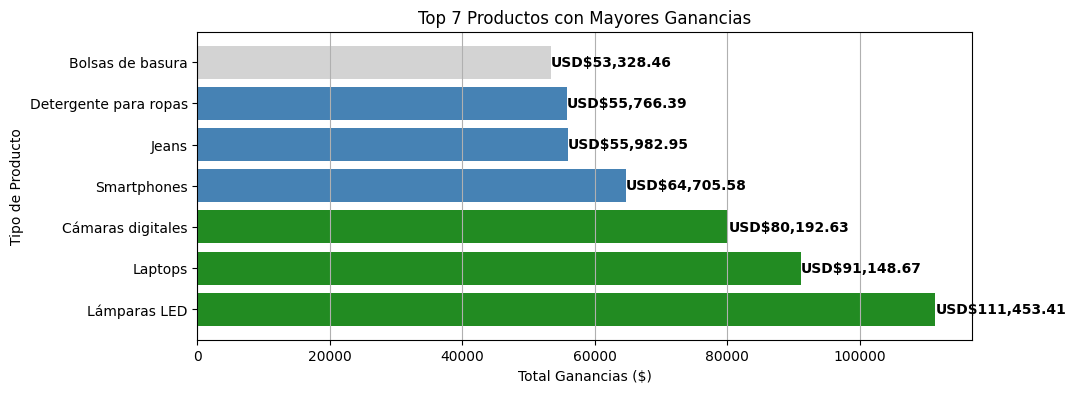

In [23]:
import matplotlib.pyplot as plt

# Seleccionar solo las 7 principales categorías
df_top7_ganancias = df_top_ganancias.head(7)

# Configurar la figura y el eje
fig, ax = plt.subplots(figsize=(10, 4))

# Datos para el gráfico
ejeX = df_top7_ganancias['total_ganancia']
ejeY = df_top7_ganancias['tipo_producto']
colores = ['forestgreen', 'forestgreen', 'forestgreen', 'steelblue', 'steelblue', 'steelblue', 'lightgray']

# Crear el gráfico de barras horizontales
ax.barh(ejeY, ejeX, color=colores, align='center')

# Colocar los valores sobre cada barra
for i, valor in enumerate(df_top7_ganancias['total_ganancia']):
    qtd = f"USD${valor:,.2f}"  # Agregar las letras "USD$" antes de cada cifra
    ax.text(valor, i, qtd, ha='left', va='center', color='black', fontweight='bold')

# Configurar el gráfico
ax.set_title('Top 7 Productos con Mayores Ganancias')
ax.set_xlabel('Total Ganancias ($)')
ax.set_ylabel('Tipo de Producto')
ax.grid(axis='x')

# Mostrar el gráfico
plt.show()



**Pregunta N° 3:** Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

In [24]:
# Crear una copia del DataFrame df_ventas_limpio
df_ventas_año_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()

# Convertir la columna 'fecha_pedido' a tipo datetime
df_ventas_año_region['fecha_pedido'] = pd.to_datetime(df_ventas_año_region['fecha_pedido'])

# Crear la columna 'año' y almacenar solo el año de 'fecha_pedido'
df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year

# Eliminar la columna 'fecha_pedido'
df_ventas_año_region.drop('fecha_pedido', axis=1, inplace=True)


In [25]:
df_ventas_año_region = pd.crosstab(index=df_ventas_año_region['año'], columns=df_ventas_año_region['region'], values=df_ventas_año_region['total_venta'], aggfunc="sum")



In [26]:
df_ventas_año_region.head()

region,Centro-Oeste,Noreste,Norte,Sur,Sureste
año,,,,,
2019,67406.37,346407.40,71778.74,44189.84,522953.51
2020,90616.80,282431.39,107309.38,61451.04,648732.79
2021,125344.52,359829.92,69534.02,110198.47,870894.51
2022,97679.64,549254.20,99195.86,99393.36,980404.44


In [27]:
import pandas as pd

# Definir las regiones de interés
regiones_interes = ['Centro-Oeste', 'Noreste', 'Norte', 'Sur', 'Sureste']

# Filtrar el DataFrame para incluir solo las regiones de interés
df_ventas_interes = df_ventas_año_region[regiones_interes].copy()

# Calcular la suma de las ventas para las regiones de interés
df_ventas_interes['Ventas_Interes'] = df_ventas_interes.sum(axis=1)

# Calcular el porcentaje de ventas para las regiones de interés
df_ventas_interes['Porcentaje_Ventas'] = (df_ventas_interes['Ventas_Interes'] / df_ventas_interes['Ventas_Interes'].sum()) * 100

# Imprimir el resultado
print(df_ventas_interes[['Ventas_Interes', 'Porcentaje_Ventas']])


region  Ventas_Interes  Porcentaje_Ventas
año                                      
2019        1052735.86          18.782064
2020        1190541.40          21.240679
2021        1535801.44          27.400531
2022        1825927.50          32.576726


region  Centro-Oeste    Noreste      Norte        Sur    Sureste
año                                                             
2019        67406.37  346407.40   71778.74   44189.84  522953.51
2020        90616.80  282431.39  107309.38   61451.04  648732.79
2021       125344.52  359829.92   69534.02  110198.47  870894.51
2022        97679.64  549254.20   99195.86   99393.36  980404.44


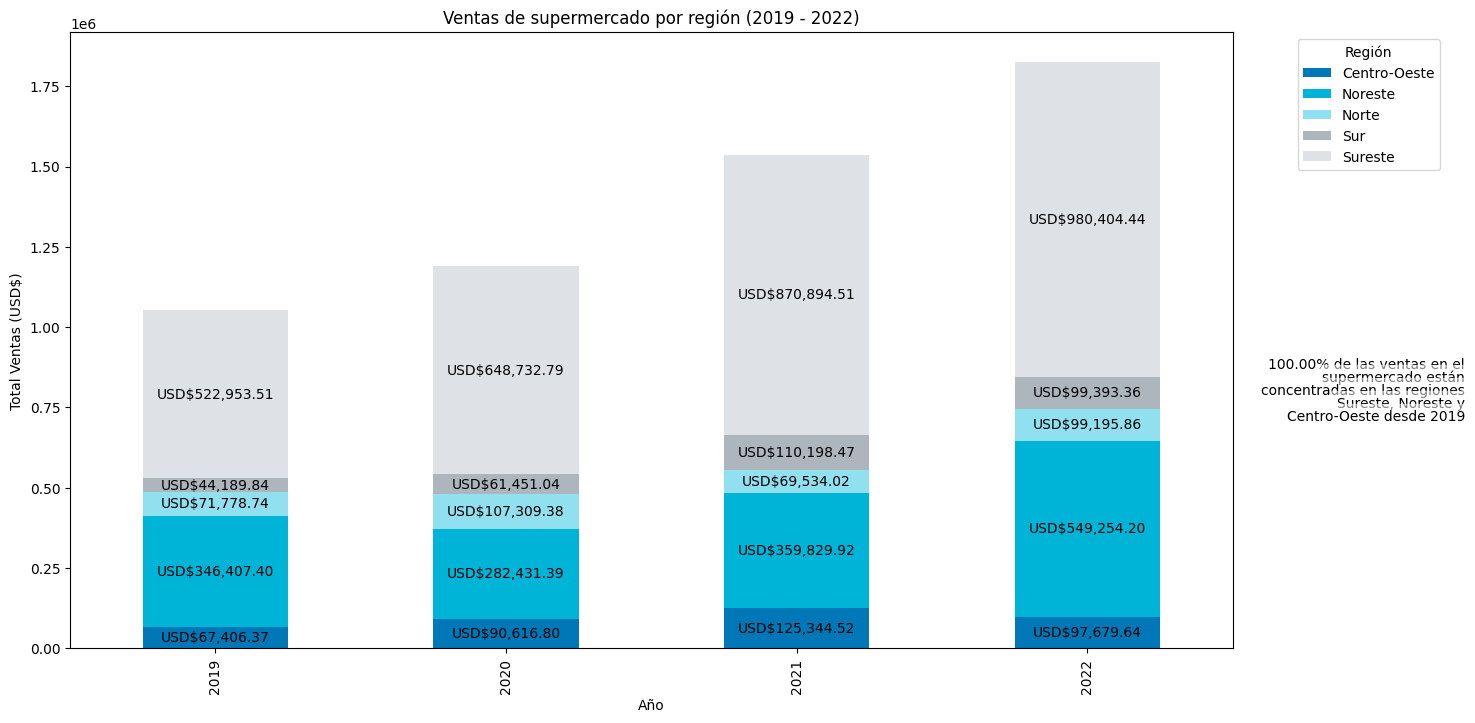

In [28]:
import matplotlib.pyplot as plt

# Definir los colores
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']

# Crear el gráfico de columnas apiladas
ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores)

# Colocar valores sobre cada segmento
for container in ax.containers:
    # Obtener las alturas acumulativas de cada segmento
    valores_acumulativos = container.datavalues
    # Colocar etiquetas en el centro de cada segmento
    ax.bar_label(container, label_type='center', labels=[f"USD${valor:,.2f}" for valor in valores_acumulativos], fontsize=10)

# Configuraciones adicionales del gráfico
ax.set_title('Ventas de supermercado por región (2019 - 2022)')
ax.set_xlabel('Año')
ax.set_ylabel('Total Ventas (USD$)')
ax.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')

# Imprimir el resultado
print(df_ventas_año_region)

import pandas as pd

# Definir las regiones de interés
regiones_interes = ['Centro-Oeste', 'Noreste', 'Norte', 'Sur', 'Sureste']

# Filtrar el DataFrame para incluir solo las regiones de interés
df_ventas_interes = df_ventas_año_region[regiones_interes].copy()

# Calcular la suma de las ventas para las regiones de interés
df_ventas_interes['Ventas_Interes'] = df_ventas_interes.sum(axis=1)

# Calcular el porcentaje de ventas para las regiones de interés
df_ventas_interes['Porcentaje_Ventas'] = (df_ventas_interes['Ventas_Interes'] / df_ventas_interes['Ventas_Interes'].sum()) * 100

# Imprimir el mensaje solicitado
total_acumulado_porcentaje = df_ventas_interes['Porcentaje_Ventas'].cumsum()
percentage = total_acumulado_porcentaje.iloc[-1]
msg_line1 = f"{percentage:.2f}% de las ventas en el"
msg_line2 = f"supermercado están"
msg_line3 = f"concentradas en las regiones"
msg_line4 = f"Sureste, Noreste y"
msg_line5 = f"Centro-Oeste desde 2019"

# Añadir el mensaje al gráfico en cinco líneas
plt.text(4.3, 870000, msg_line1, fontsize=10, ha='right', bbox=dict(facecolor='white', alpha=0.5, edgecolor='white'))
plt.text(4.3, 830000, msg_line2, fontsize=10, ha='right', bbox=dict(facecolor='white', alpha=0.5, edgecolor='white'))
plt.text(4.3, 790000, msg_line3, fontsize=10, ha='right', bbox=dict(facecolor='white', alpha=0.5, edgecolor='white'))
plt.text(4.3, 750000, msg_line4, fontsize=10, ha='right', bbox=dict(facecolor='white', alpha=0.5, edgecolor='white'))
plt.text(4.3, 710000, msg_line5, fontsize=10, ha='right', bbox=dict(facecolor='white', alpha=0.5, edgecolor='white'))

# Mostrar el gráfico
plt.show()


**Pregunta N° 4:** ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?


segmento_cliente   B2B   B2C
modo_envio                  
24 horas           171   231
Envío rápido       543   542
Económico          707   755
Entrega estándar  2048  2213


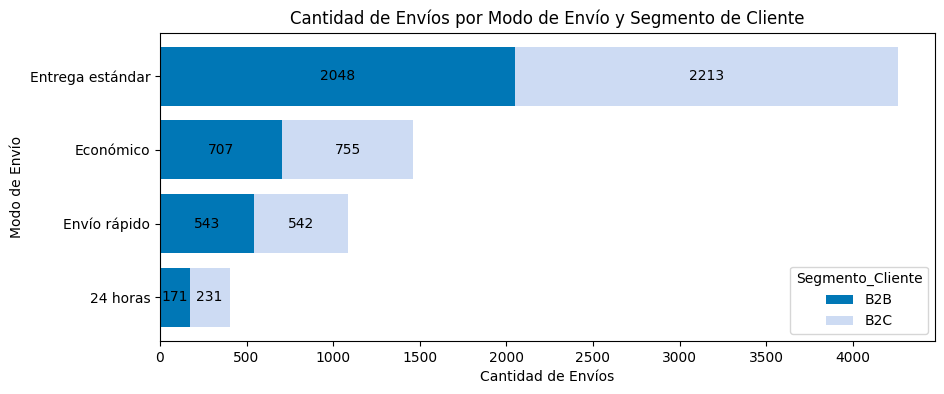

In [29]:
import matplotlib.pyplot as plt

def pregunta_4():
    global df_ventas_limpio  # Asumiendo que df_ventas_limpio ya está cargado

    # 1. Preparación de los datos
    df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']]

    # Generar tabla cruzada con el método pd.crosstab
    tabla_cruzada = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente'])
    tabla_cruzada = tabla_cruzada.sort_values(by='B2B')

    # Mostrar la tabla cruzada
    print(tabla_cruzada)

    # 2. Visualización
    colores = ['#0077b6', '#CDDBF3']

    # Configurar la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 4))

    # Crear el gráfico de barras horizontales
    for idx, seg in enumerate(tabla_cruzada.index):
        ax.barh(seg, tabla_cruzada.loc[seg]['B2B'], color=colores[0], label='B2B' if idx == 0 else '')
        ax.barh(seg, tabla_cruzada.loc[seg]['B2C'], left=tabla_cruzada.loc[seg]['B2B'], color=colores[1], label='B2C' if idx == 0 else '')

    # Colocar etiquetas dentro de cada segmento
    for container in ax.containers:
        labels = [f"{valor}" for valor in container.datavalues]
        ax.bar_label(container, label_type='center', labels=labels)

    # Añadir leyenda y etiquetas
    ax.legend(title='Segmento_Cliente')
    ax.set_xlabel('Cantidad de Envíos')
    ax.set_ylabel('Modo de Envío')
    ax.set_title('Cantidad de Envíos por Modo de Envío y Segmento de Cliente')

    # Mostrar el gráfico
    plt.show()

# Llamar a la función
pregunta_4()














**Pregunta N° 5:** ¿Cuáles son las ventas totales por trimestre en el estado de Sao Paulo?



   fecha_pedido  total_venta
0    2019-03-31     27377.18
1    2019-06-30     33951.90
2    2019-09-30     90208.89
3    2019-12-31    124093.79
4    2020-03-31     26732.22
5    2020-06-30     66150.54
6    2020-09-30    109179.83
7    2020-12-31    180421.18
8    2021-03-31     35740.45
9    2021-06-30     95443.61
10   2021-09-30    119422.82
11   2021-12-31    236502.75
12   2022-03-31     61785.08
13   2022-06-30     74727.59
14   2022-09-30    144519.71
15   2022-12-31    307359.21


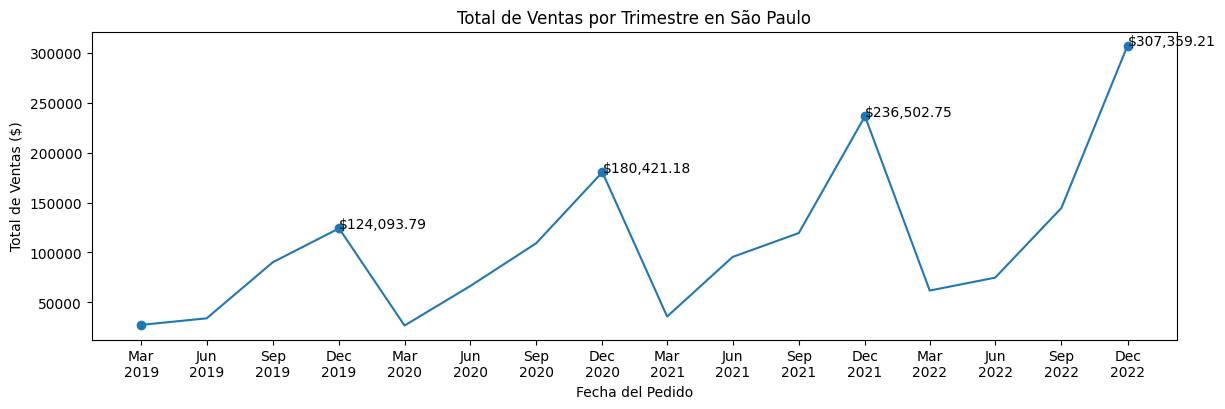

In [30]:
import matplotlib.pyplot as plt

def pregunta_5():
    global df_ventas_limpio  # Asumiendo que df_ventas_limpio ya está cargado

    # 1. Preparación de los datos
    df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'].copy()
    df_ventas_sp = df_ventas_sp[['fecha_pedido', 'total_venta']]

    # Convertir la columna 'fecha_pedido' a tipo datetime
    df_ventas_sp['fecha_pedido'] = pd.to_datetime(df_ventas_sp['fecha_pedido'])

    # Establecer 'fecha_pedido' como índice
    df_ventas_sp.set_index('fecha_pedido', inplace=True)

    # Agrupar las ventas por trimestre y redondear el total_venta
    df_ventas_sp = df_ventas_sp.resample('Q').agg({'total_venta': 'sum'}).round(2)
    df_ventas_sp.reset_index(inplace=True)

    # Mostrar el resultado
    print(df_ventas_sp)

    # 2. Visualización
    colores = ['#1f77b4']
    puntos_a_marcar = [True, False, False, True, False, False, False, True, False, False, False, True, False, False, False, True]

    # Configurar la figura y el eje
    fig, ax = plt.subplots(figsize=(14, 4))

    # Crear el gráfico de líneas
    ax.plot(df_ventas_sp['fecha_pedido'], df_ventas_sp['total_venta'], marker="o", markevery=puntos_a_marcar, color=colores[0])

    # Reemplazar las fechas en el ejeX por el nombre del mes y el año
    x_labels = [f"{fecha.strftime('%b')}\n{fecha.year}" for fecha in df_ventas_sp['fecha_pedido']]
    ax.set_xticks(df_ventas_sp['fecha_pedido'])
    ax.set_xticklabels(x_labels, ha="center")

    # Colocar valores solo en el 4to Trimestre
    for i in range(3, len(df_ventas_sp['total_venta']), 4):
        ax.text(ax.get_xticks()[i], df_ventas_sp['total_venta'][i], f"${df_ventas_sp['total_venta'][i]:,.2f}")

    # Añadir etiquetas
    ax.set_xlabel('Fecha del Pedido')
    ax.set_ylabel('Total de Ventas ($)')
    ax.set_title('Total de Ventas por Trimestre en São Paulo')

    # Mostrar el gráfico
    plt.show()

# Llamar a la función
pregunta_5()


**Pregunta N° 6:** ¿Cuál es el top 5 de las ciudades con mayor cantidad de pedidos?


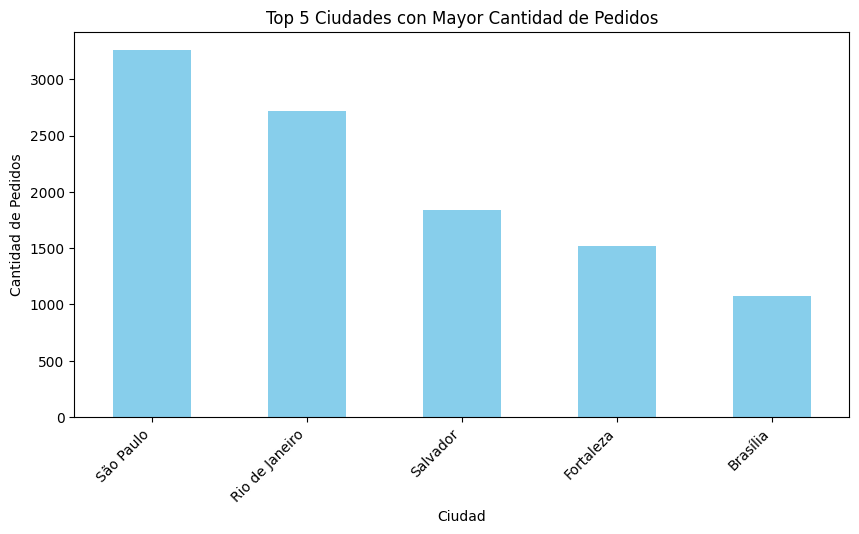

In [31]:
import matplotlib.pyplot as plt

# 1. Filtrar la información relevante
df_ciudades_pedidos = df_ventas_limpio[['ciudad', 'cantidad_pedido']]

# 2. Agrupar por ciudad y sumar la cantidad de pedidos
pedidos_por_ciudad = df_ciudades_pedidos.groupby('ciudad')['cantidad_pedido'].sum().sort_values(ascending=False)

# 3. Seleccionar las 5 ciudades con mayor cantidad de pedidos
top5_ciudades = pedidos_por_ciudad.head(5)

# 4. Visualizar los resultados
fig, ax = plt.subplots(figsize=(10, 5))
top5_ciudades.plot(kind='bar', color='skyblue')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Cantidad de Pedidos')
ax.set_title('Top 5 Ciudades con Mayor Cantidad de Pedidos')
plt.xticks(rotation=45, ha='right')
plt.show()

